# # Project: TMDb Dataset Analysis


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The following code will analyze TMDb Dataset according to the following questions:

1. How does the genres affect the revenue by the mean of Benifit/Cost Ratio?
2. What are the factors that affect the rating of a movie?

The dataset contains a lot of information and for the sake of the previous questions we will elemenate unnecessery data and the remaining data will be the following columns:
(popularity, original_title, runtime, genres, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj)

The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. so we will delete the revenue and budget columns in order to make a fair comparison.

The following analysis is tentative.

Dataset source : https://www.kaggle.com/tmdb/tmdb-movie-metadata

This project used helps and infromation from : https://stackoverflow.com/

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
df = pd.read_csv('tmdb-movies.csv')

In [4]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df.shape

(10866, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


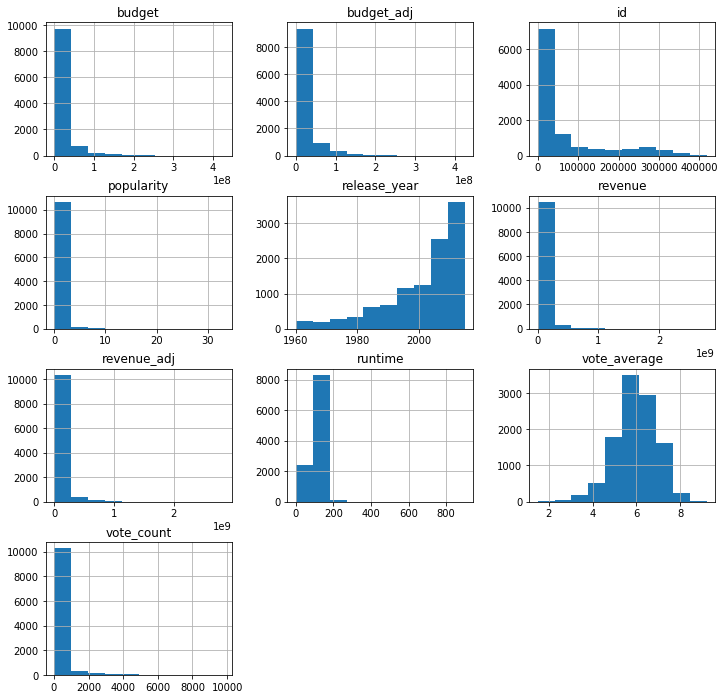

In [8]:
df.hist(figsize=(12,12));

#### Observations:
    1. Movies with 0 budgets.
    2. Movies with 0 revenues.
    3. Movies with 0 runtime.
    4. No data type change needed.
    5. 'genres' column must contains unwated symbols "|"

### Data Cleaning
    1. Delete unrelated columns
    2. Clean the duplicates
    3. Clean the empty values
    4. Remove 0 budget, revenues and running time films
    5. Deal with "|" in the 'genres' column
    6. Change 'release_date' to timestamp type### Data Cleaning (Replace this with more specific notes!)

>**Fact**: The following code will provide an Analysis based on the previous questions 

1. Delete unrelated columns

In [9]:
dropped_columns = ['id','imdb_id','director','budget','revenue','cast','homepage','tagline','keywords','overview','production_companies']
df.drop(dropped_columns, axis=1, inplace=True)

2. Check for duplicates

In [10]:
df.duplicated().sum()

1

As the duplicated rows = 1 then this row will be dropped 

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

3. Clean the empty values

In [13]:
df.isnull().sum()

popularity         0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

We have a really huge dataset for movies, these 23 movies without genres will be dropped and will make no effect in our precision of our analysis 

In [14]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10842 non-null float64
original_title    10842 non-null object
runtime           10842 non-null int64
genres            10842 non-null object
release_date      10842 non-null object
vote_count        10842 non-null int64
vote_average      10842 non-null float64
release_year      10842 non-null int64
budget_adj        10842 non-null float64
revenue_adj       10842 non-null float64
dtypes: float64(4), int64(3), object(3)
memory usage: 931.7+ KB


4. Remove 0 budget, 0 revenues and 0 running time films

In [15]:
df = df[~(df == 0).any(axis=1)]
df.shape

(3854, 10)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1. How does the genres affect the revenue by the mean of Benifit/Cost Ratio?

##### 'geners' column has multiple values for each movie so the following points will be coded in order to answer our questions:
    1.Extract all uniques genres.
    2.Add a new column called 'ben_cos_rat' = revenue_adj/budget_adj
    3.Extract a new DatFrame from the original one that contains the 'title' and value of B/C ratio for it genres.
    4.Substract ouliers values '> 200' from our calculations
    5.Visulaize the results

1.Extract all uniques genres.

In [16]:
genres_col = df['genres'].tolist()
genres_set = set()
for c in genres_col:
    v = c.split("|")
    for i in v:
        genres_set.add(i)
print(genres_set)

{'Animation', 'Comedy', 'Horror', 'Romance', 'Crime', 'TV Movie', 'Foreign', 'Family', 'Music', 'Fantasy', 'Action', 'Drama', 'History', 'Science Fiction', 'Thriller', 'Adventure', 'Mystery', 'Documentary', 'War', 'Western'}


In [17]:
genres_list = list(genres_set)
genres_list

['Animation',
 'Comedy',
 'Horror',
 'Romance',
 'Crime',
 'TV Movie',
 'Foreign',
 'Family',
 'Music',
 'Fantasy',
 'Action',
 'Drama',
 'History',
 'Science Fiction',
 'Thriller',
 'Adventure',
 'Mystery',
 'Documentary',
 'War',
 'Western']

2.Add a new column called 'ben_cos_rat' = revenue_adj/budget_adj

In [18]:
df['ben_cos_rat'] = df['revenue_adj']/df['budget_adj']
df.head()

,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,ben_cos_rat
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,10.090192
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.522909
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,2.683984
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,10.340891
4,9.335014,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,7.927628


3.Extract a new DatFrame from the original one that contains the 'title' and value of B/C ratio for it genres.

In [19]:
title = np.array(df['original_title'])
bentocost = np.array(df['ben_cos_rat'])
bencost_df = pd.DataFrame(index = title, columns = genres_list)
bencost_df = bencost_df.fillna(value = 0.0)

x = 0 
for i in genres_col:
    split_genre = i.split("|")
    bencost_df.loc[title[x], split_genre] = bencost_df.loc[title[x], split_genre] + bentocost[x]
    x+=1

In [63]:
bencost_df.head()

,Animation,Comedy,Horror,Romance,Crime,TV Movie,Foreign,Family,Music,Fantasy,Action,Drama,History,Science Fiction,Thriller,Adventure,Mystery,Documentary,War,Western
Jurassic World,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,10.090192,0.0,0.0,10.090192,10.090192,10.090192,0.0,0.0,0.0,0.0
Mad Max: Fury Road,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,2.522909,0.0,0.0,2.522909,2.522909,2.522909,0.0,0.0,0.0,0.0
Insurgent,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,2.683984,2.683984,2.683984,0.0,0.0,0.0,0.0
Star Wars: The Force Awakens,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,10.340891,10.340891,0.0,0.0,10.340891,0.000000,10.340891,0.0,0.0,0.0,0.0
Furious 7,0.0,0.0,0.0,0.0,7.927628,0.0,0.0,0.0,0.0,0.000000,7.927628,0.0,0.0,0.000000,7.927628,0.000000,0.0,0.0,0.0,0.0


4. Substract ouliers values '> 200' from our calculations

In [23]:
no_fliers_df = bencost_df[~(bencost_df > 200).any(axis=1)]

5.Visulaize the results

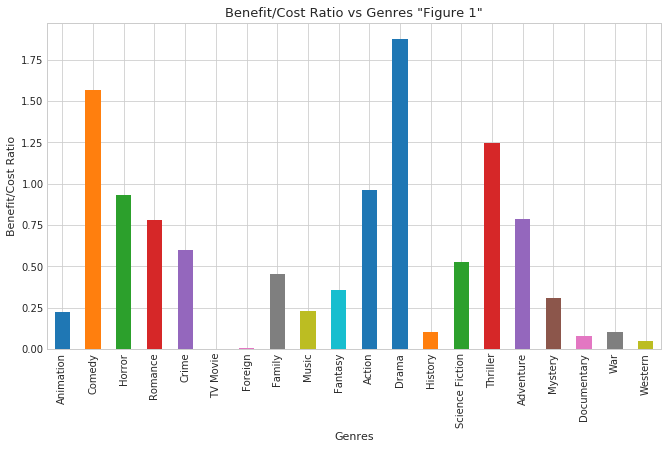

In [58]:
plt.subplots(figsize=(11,6))
no_fliers_df.mean().plot(kind='bar')
plt.xlabel('Genres', fontsize=11)
plt.ylabel('Benefit/Cost Ratio', fontsize=11)
plt.title('Benefit/Cost Ratio vs Genres "Figure 1"', fontsize=13);

### Research Question 2.What are the factors that affect the rating 'vote_average' of a movie?

In [50]:
df_corr = df.corr()
df_corr

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,ben_cos_rat
popularity,1.000000,0.215092,0.780096,0.317866,0.173278,0.399356,0.546959,-0.005451
runtime,0.215092,1.000000,0.273771,0.351712,-0.112453,0.333976,0.280505,0.002721
vote_count,0.780096,0.273771,1.000000,0.387210,0.207191,0.497970,0.654688,-0.006478
vote_average,0.317866,0.351712,0.387210,1.000000,-0.134246,0.036803,0.266844,-0.007945
release_year,0.173278,-0.112453,0.207191,-0.134246,1.000000,0.075103,-0.103147,-0.022804
budget_adj,0.399356,0.333976,0.497970,0.036803,0.075103,1.000000,0.570451,-0.017714
revenue_adj,0.546959,0.280505,0.654688,0.266844,-0.103147,0.570451,1.000000,0.006391
ben_cos_rat,-0.005451,0.002721,-0.006478,-0.007945,-0.022804,-0.017714,0.006391,1.000000


Correlation Between Rating And Runtime :  0.351712098838


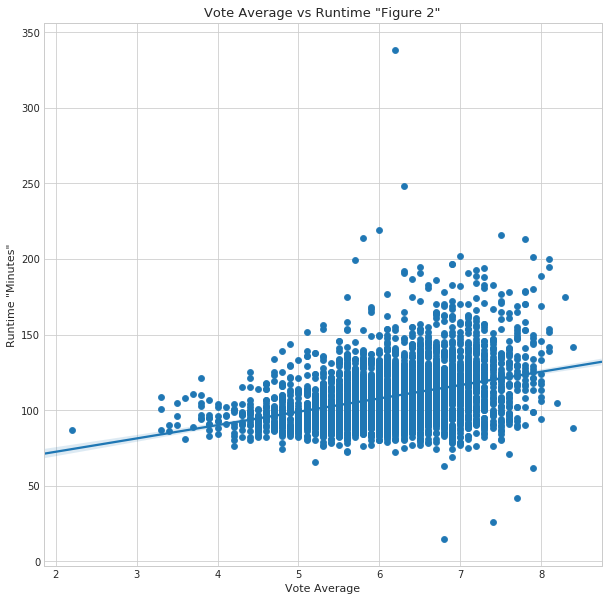

In [59]:
df.plot(x="vote_average", y="runtime", kind='scatter', figsize=(10,10))
sns.regplot(x=df['vote_average'], y=df['runtime']);
plt.xlabel('Vote Average', fontsize=11)
plt.ylabel('Runtime "Minutes"', fontsize=11)
plt.title('Vote Average vs Runtime "Figure 2"', fontsize=13);
print("Correlation Between Rating And Runtime : ",df_corr.loc['vote_average','runtime'])

Correlation Between Rating And Revenue :  0.266844491798


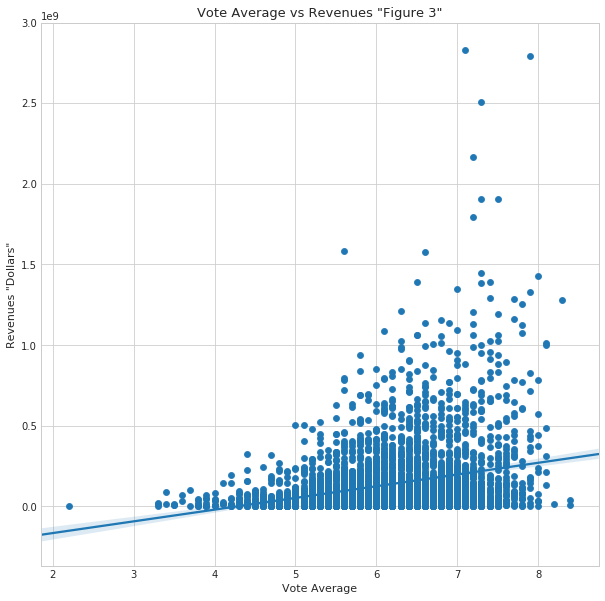

In [60]:
df.plot(x="vote_average", y="revenue_adj", kind='scatter', figsize=(10,10))
sns.regplot(x=df['vote_average'], y=df['revenue_adj']);
plt.xlabel('Vote Average', fontsize=11)
plt.ylabel('Revenues "Dollars"', fontsize=11)
plt.title('Vote Average vs Revenues "Figure 3"', fontsize=13);
print("Correlation Between Rating And Revenue : ",df_corr.loc['vote_average','revenue_adj'])

Correlation Between Rating And Popularity :  0.317866165723


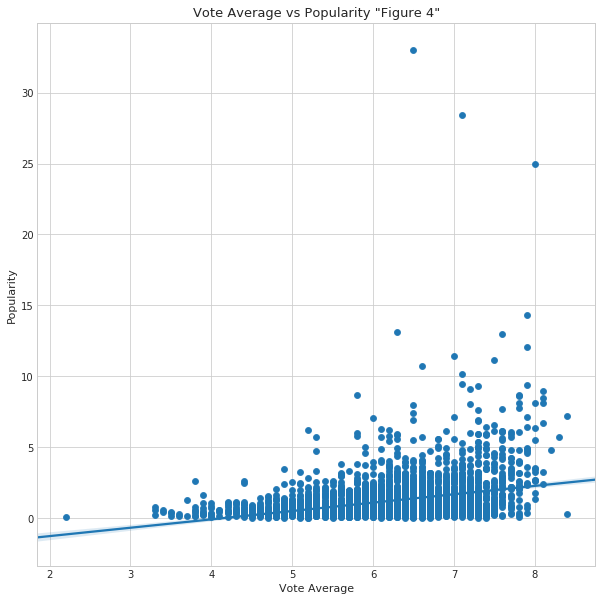

In [61]:
df.plot(x="vote_average", y="popularity", kind='scatter', figsize=(10,10))
sns.regplot(x=df['vote_average'], y=df['popularity']);
plt.xlabel('Vote Average', fontsize=11)
plt.ylabel('Popularity', fontsize=11)
plt.title('Vote Average vs Popularity "Figure 4"', fontsize=13);
print("Correlation Between Rating And Popularity : ",df_corr.loc['vote_average','popularity'])

<a id='conclusions'></a>
## Conclusions
#### How does the genres affect the revenue by the mean of Benifit/Cost Ratio?

According to Figure 1 the top 3 returning genres are the following in descending order : 

1.Drama

2.Comedy

3.Thriller

#### What are the factors that affect the rating 'vote_average' of a movie?
According to Figure 2 The higher Runtime the better Rating correlation coefficient = 0.351712098838

According to Figure 3 The higher Revenue the better Rating correlation coefficient = 0.266844491798

According to Figure 4 The higher Popularity the better Rating correlation coefficient = 0.317866165723



## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [65]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0